# 🩻 FactCheXcker Examples

In this notebook, we will walk through using FactCheXcker using three example images from the MIMIC-CXR dataset (note, however, that the accompanying reports are fictional). For full MIMIC-CXR access, please refer to the instructions on the PhysioWeb Website.

### Step 1: Load the example images

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from api import *
from FactCheXcker import FactCheXcker
from helpers import load_json

# Load the relevant config file
module_registry = CXRModuleRegistry("configs/config.json")

# Convert JSON to CXRImage Objects
cxr_images_json = load_json("examples/reports.json")
cxr_images = {}
for rid in cxr_images_json.keys():
    cxr_images[rid] = CXRImage(
        rid=rid, 
        module_registry=module_registry,
        **cxr_images_json[rid]
    )

# Display
cxr_images

Seed set to 2024
/Users/alice/miniforge3/envs/factchexcker/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/alice/miniforge3/envs/factchexcker/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


{'id0001': <api.CXRImage at 0x107c8aef0>,
 'id0002': <api.CXRImage at 0x107c8a260>,
 'id0003': <api.CXRImage at 0x107c8b580>}

We can then try out the API on one of the images.

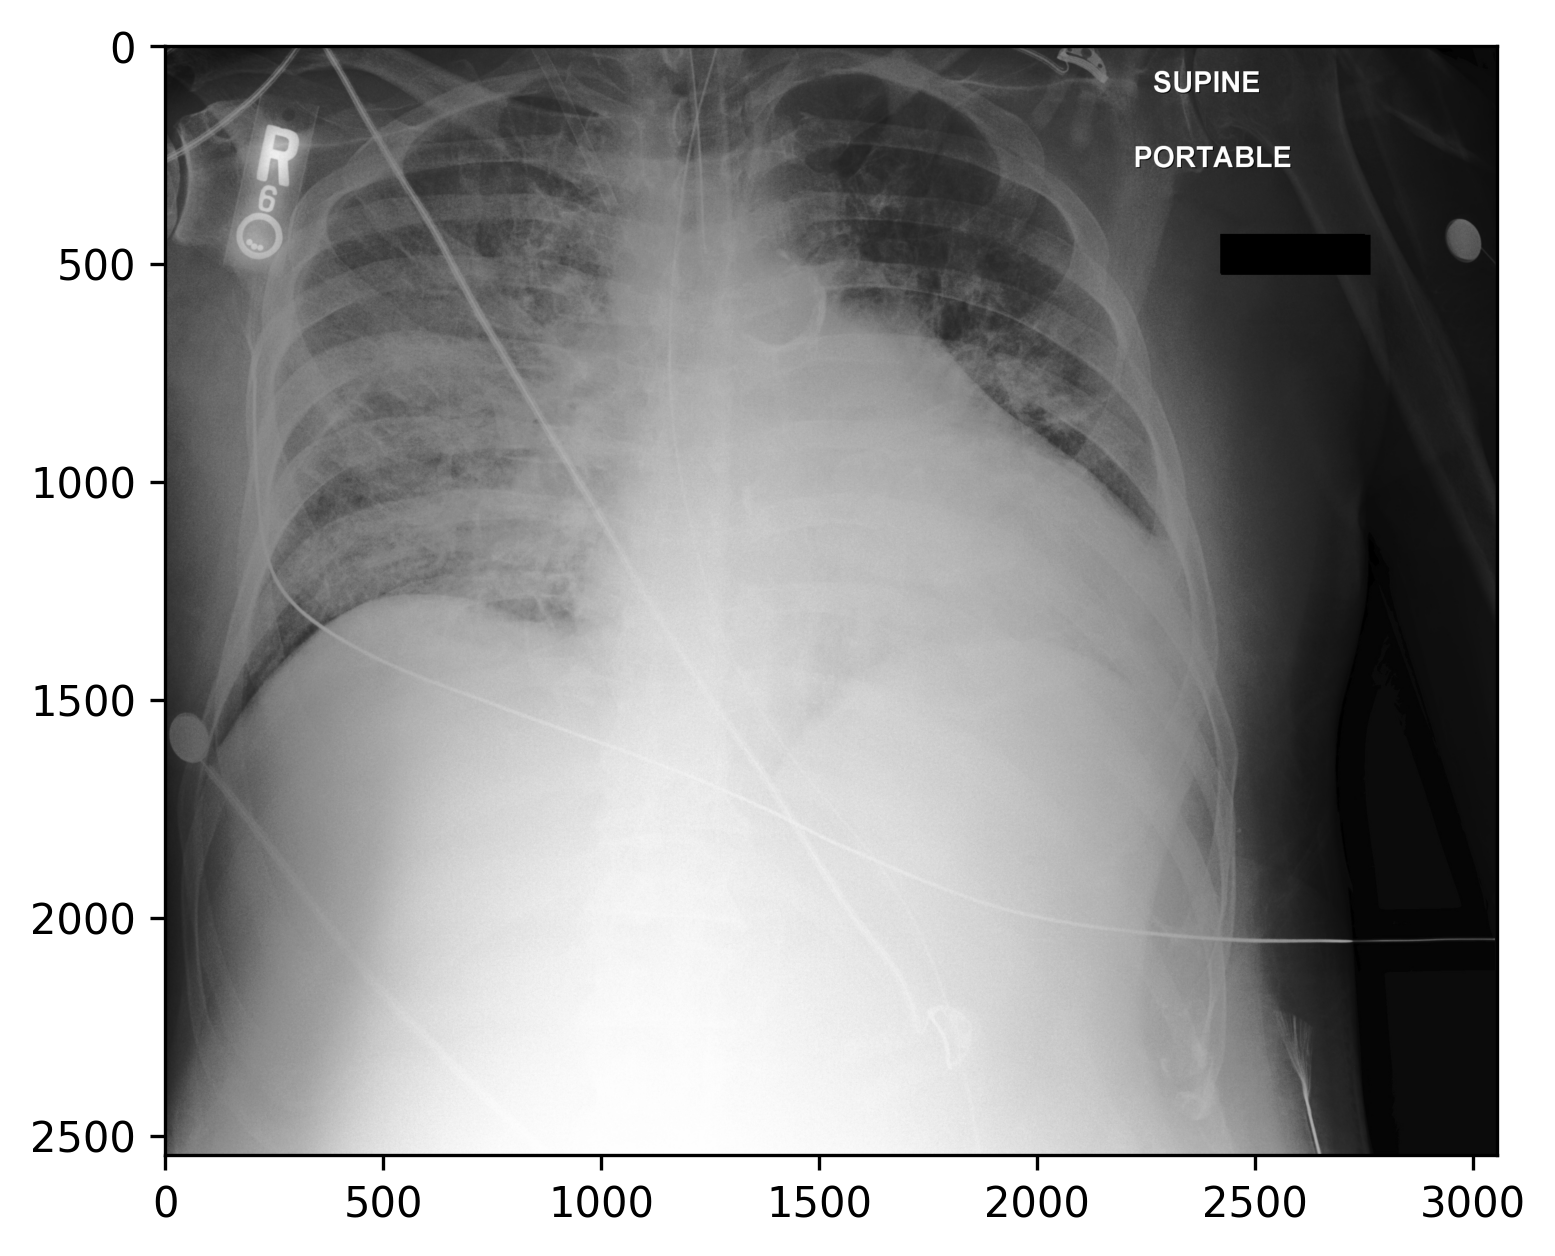

In [4]:
cxr_images["id0001"].display()

## Example 1: Use the FactCheXcker Pipeline

In [7]:
pipeline = FactCheXcker(config="configs/config.json")
updated_report = pipeline.run_pipeline(cxr_images["id0001"])
print("Original Report:")
print(cxr_images[0].report)
print("Updated Report:")
print(updated_report)

NameError: name 'FactCheXcker' is not defined

## Example 2: Using the API directly

In [8]:
# Presence
ett_present = cxr_images["id0001"].exists("ett")
print("ETT Present:", ett_present)

ETT Present: True


In [9]:
# Get distance between ETT and Carina
ett_object = cxr_images["id0001"].find("ett")
carina_object = cxr_images["id0001"].find("carina")
distance = cxr_images["id0001"].distance(ett_object[0], carina_object[0])
round(distance, 2)

(253.5, 124.5)


3.18

## Example 3: Expand with new tool modules

Follow the instructions in the `README.md` to edit and add your own custom tool modules to extend the FactCheXcker framework! Happy building!